Como es un conjunto finito de números, tiene que existir si o si una órbita, pues el conjunto tiene m elementos.
Lo mas simple es empezar por un m primo, habría que ver tambień la longitud de la órbita.
Podemos ver gráficamente esto para hacerlo mas facil, mediante grafos

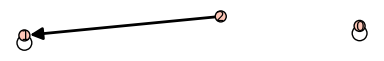

In [3]:
def cuadrados_mod(n, m):
    return (n*n)%m

def diccionario(m):
    dic={}
    for i in srange(0, m):
        dic[i]=[cuadrados_mod(i, m)]
    return dic

G = DiGraph(diccionario(3))
G.graphplot().show()

El 17 por ejemplo,es una potencia de dos mas 1, por lo que tiene ese comportamiento raro

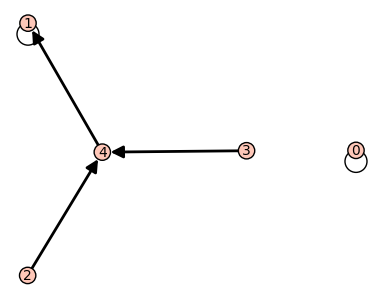

In [4]:
G = DiGraph(diccionario(5))
G.graphplot().show()

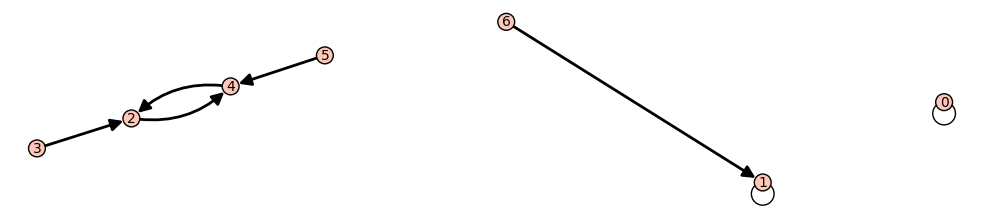

In [5]:
G = DiGraph(diccionario(7))
G.graphplot().show(figsize=[10, 10])

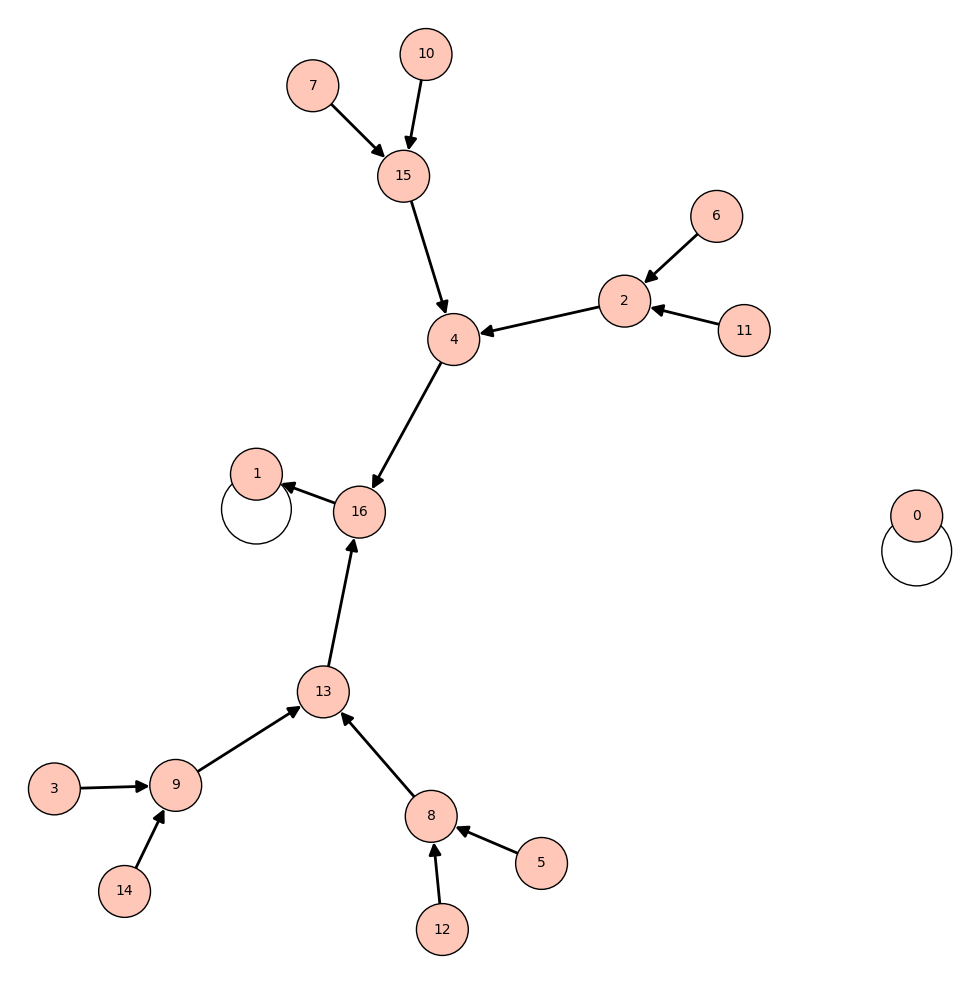

In [6]:
G = DiGraph(diccionario(17))
G.graphplot().show(figsize=[10, 10])

Buscamos una función que nos permita ver los ciclos que tiene la función en modulo m. Por ejemplo, para m=7, que devuelva [[0], [1], [2, 4]]

[[0], [1], [16], [9]]

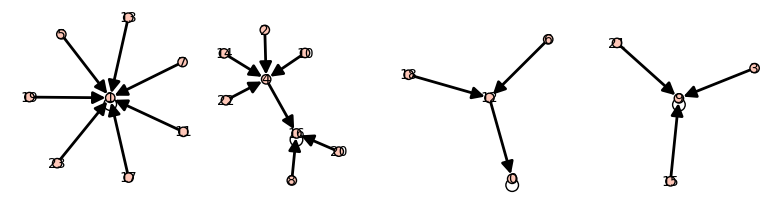

In [52]:
def mismaLista(l1, l2):
    if len(l1) != len(l2):
        return False
    for i in range(len(l1)):
        if l1[i] not in l2:
            return False
    return True

def listaMetida(l, l1):
    for i in l:
        if mismaLista(i, l1):
            return True
    return False

def orbita(i, m):
    lTemp = []
    result = i
    while result not in lTemp:
        lTemp.append(result)
        result = cuadrados_mod(result, m)
        
    last = lTemp.index(result)
    
    return lTemp[last:]

def ciclos(m):
    l = []
    for i in srange(m):
        lTemp = orbita(i, m)
        #print(lTemp)
        if lTemp not in l and not listaMetida(l, lTemp):
            l.append(lTemp)
    return l

m=24
show(ciclos(m))
G = DiGraph(diccionario(m))
G.graphplot().show(figsize=[8, 9])
#orbita(3, 7)

Una vez hecho esto sabemos que, obviamente, todos van a tener el 0 y el 1 como ciclos. Tenemos que ver que enteros m tienen solo estos dos ciclos.
Podemos ver que del 1 al 5, solo tienen estos, mientras que el 6 tiene tambien el ciclo 4, 3.

Podemos ver también haciendo pruebas que todas las potencias de dos tienen únicamente el 0 y el 1.
Vamos a intentar ver entonces qué numeros tienen solo el 1 y el 2 como órbitas:

In [69]:
for i in range(0, 600):
    orb = ciclos(i)
    if len(orb)==2 and ([1] in orb) and ([0] in orb):
        print(i)

2
3
4
5
8
16
17
32
64
128
256
257
512


Por tanto, parece ser que la conjetura sería:

Los ciclos de f en módulo $m$ son $0$, $1 \Leftrightarrow m = 2^x$ o $m = 2^{2^x}, x \in N$ 